In [20]:
%config InlineBackend.figure_format='retina'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.colors
%matplotlib inline

In [34]:
mbox = pd.read_csv('mailboxes/values_device_28002c000747373336373936_mlrcy.csv')
ucon = pd.read_csv('ucon/values_device_1a0031001950483553353620_4yure.csv')
glen = pd.read_csv('glenwood/values_device_2f003a000c47373336373936_00i5i.csv')

def rename_vars(df):
    df['Human readable date'] = pd.DatetimeIndex(df['Human readable date'] )
    df = df.set_index('Human readable date')
    df = df.sort_index()
    # just look at July onward for consistency
    df = df[df.index > pd.Timestamp('2020-06-30')]
    df.dayofweek = df.index.dayofweek
    df.weekofyear = df.index.week
    return df
mbox = rename_vars(mbox)
ucon = rename_vars(ucon)
glen = rename_vars(glen)

In [33]:
aqi = pd.read_csv('ad_viz_plotval_data.csv.xls')
aqi = aqi[aqi['Site Name'] == 'Santa Cruz']
aqi['Date'] = pd.DatetimeIndex(aqi['Date'])
aqi = aqi.set_index('Date')

# Data by time of day
Note that at some locations the number of data points varies throughout the year, leading to the potential for inconsistencies in data analysis. For example, we are missing early morning and early evening riders on U-Con starting in November (of course the daylight is shorter at those times, too). The data are especially spotty at Mailboxes. This potentially points to a connectivity issue.

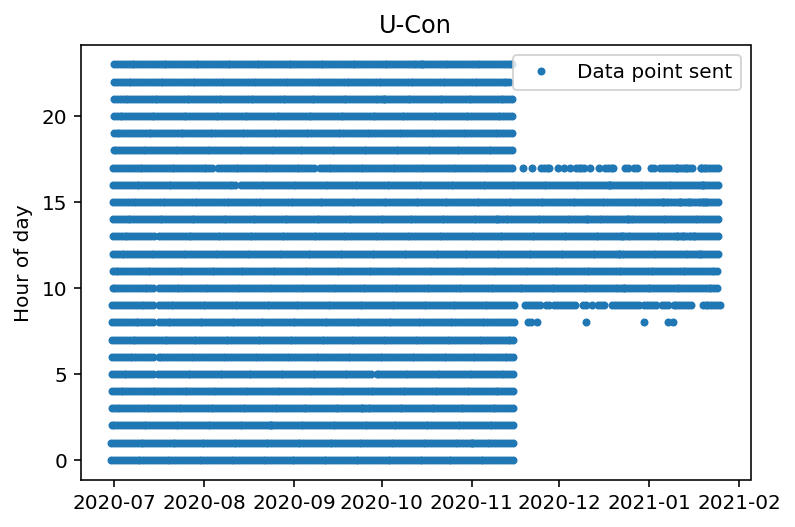

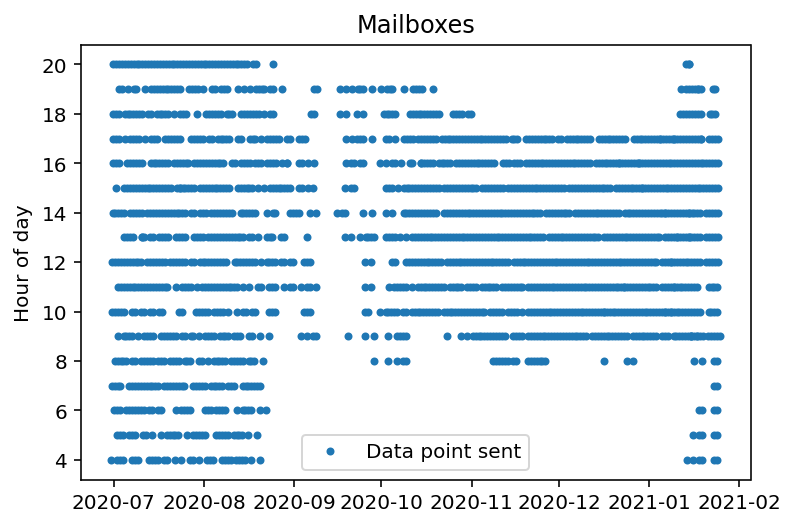

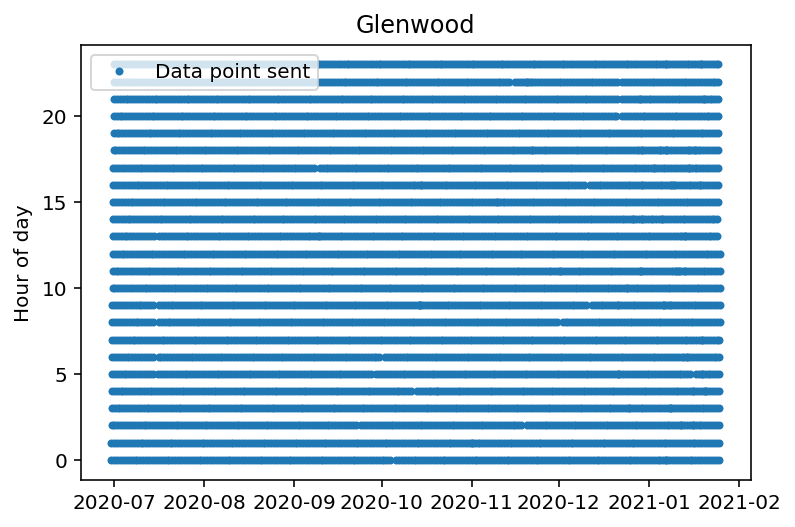

In [150]:
def plot(df, title=None):
    plt.figure()
    plt.plot(df.index, df.index.hour, '.', label='Data point sent')
    plt.ylabel('Hour of day')
    plt.title(title)
    plt.legend()
    plt.show()
plot(ucon, 'U-Con')
plot(mbox, 'Mailboxes')
plot(glen, 'Glenwood')

# Daily riders and AQI (inspired by SeanPaul)
Smoke from the fires severely reduced ridership during August and September.

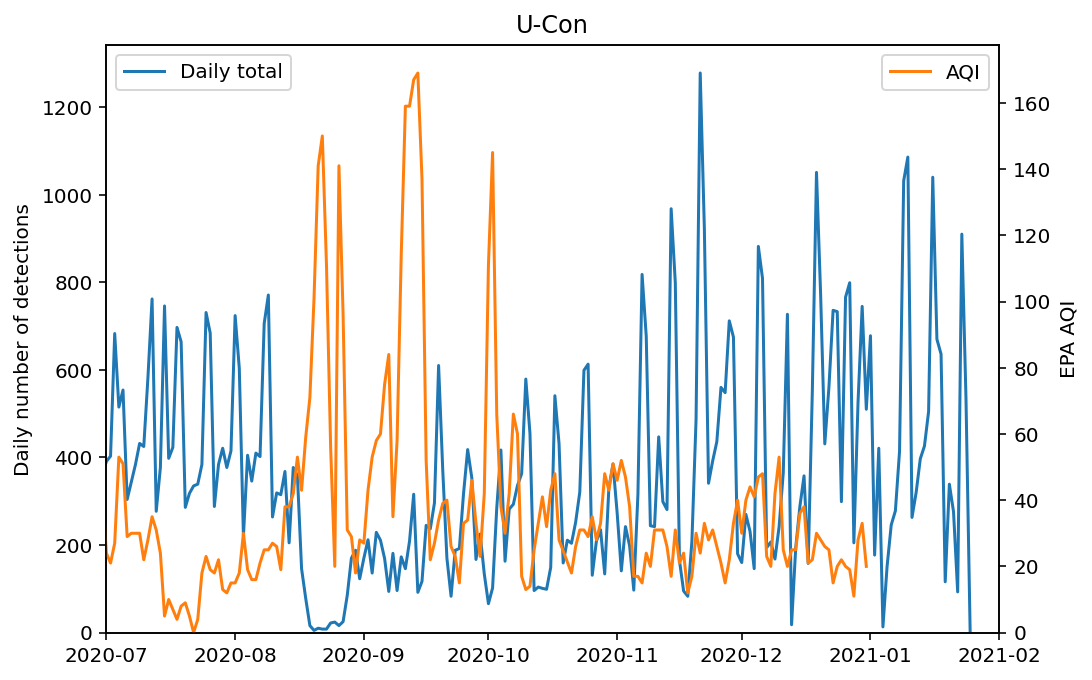

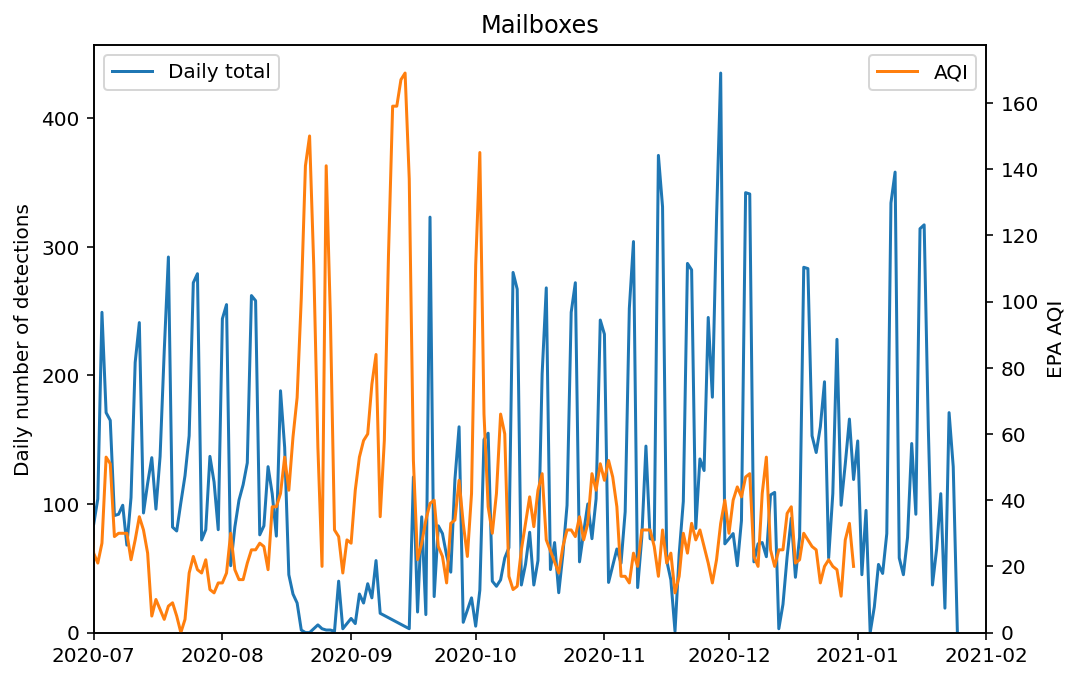

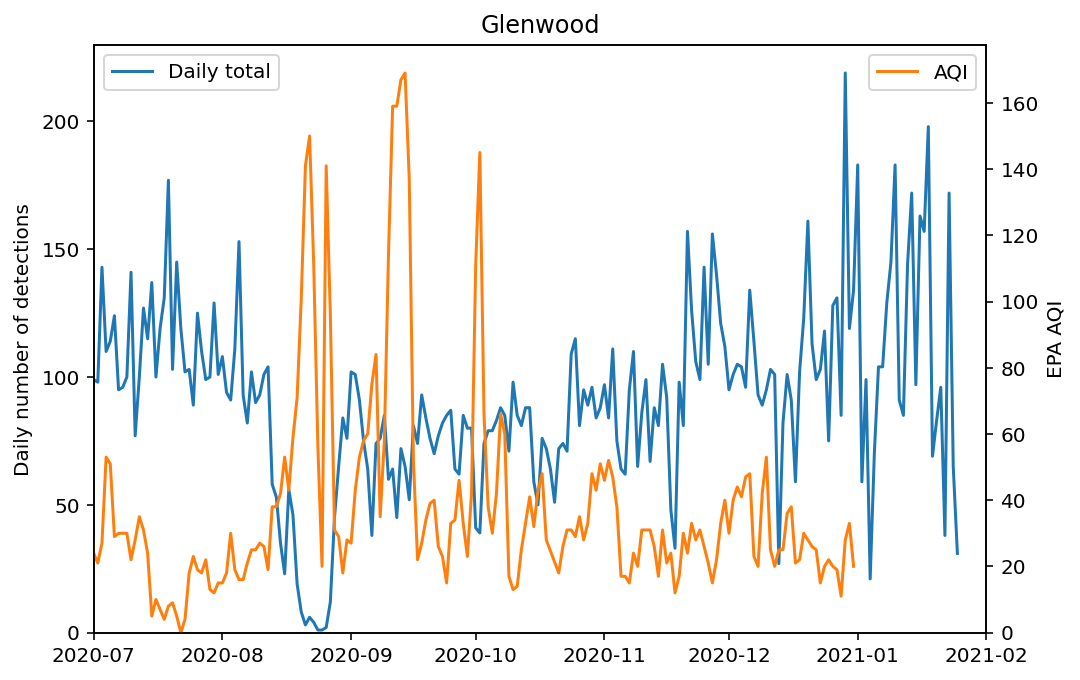

In [24]:
def plot(df, title=None):
    plt.figure(figsize=(8,6))
    df.groupby(df.index.date).sum()['hourly'].plot(label='Daily total')
    plt.ylabel('Daily number of detections')
    plt.ylim(ymin=0)
    plt.legend(loc='upper left')
    plt.twinx()
    aqi['DAILY_AQI_VALUE'].plot(color='C1', label='AQI')
    plt.legend(loc='upper right')
    plt.xlim('2020-07', '2021-02')
    plt.ylim(ymin=0)
    plt.title(title)
    plt.ylabel('EPA AQI')
#     plot(ucon)
plot(ucon, title='U-Con')
plot(mbox, title='Mailboxes')
plot(glen, title='Glenwood')

# Riders by day of week
Ridership is unsurprisingly highest on the weekend days. This pattern is not as strong at West Glenwood.

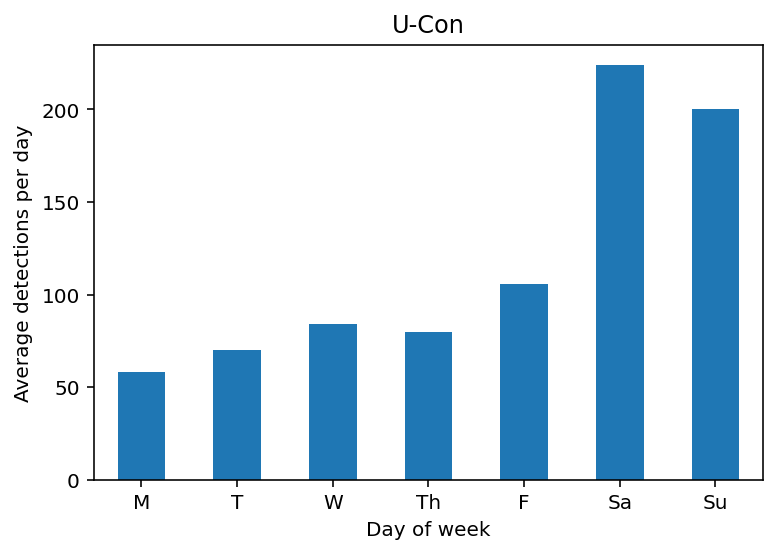

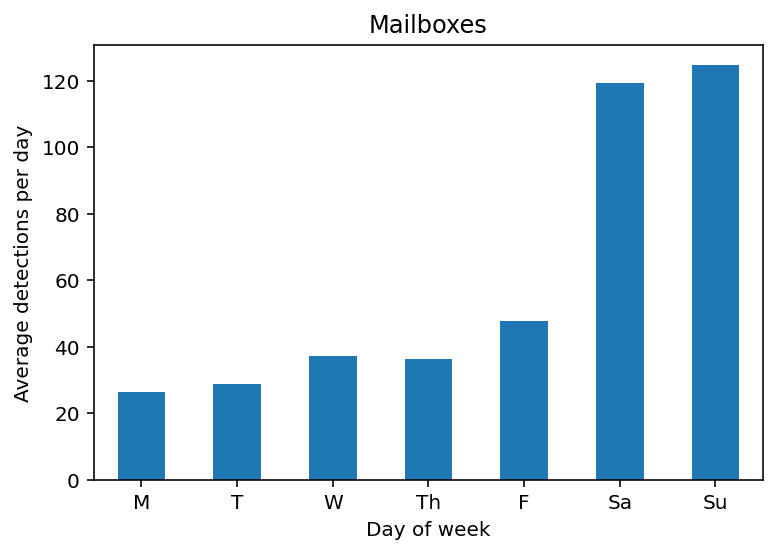

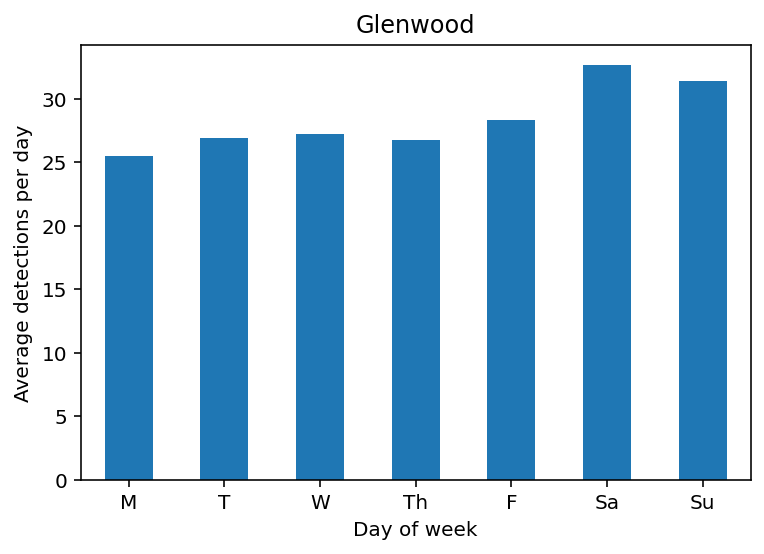

In [25]:
def plot(df, title=None):
    gb = df.groupby(df.index.dayofweek)
    gbm = gb.mean()
    gbm['daily'].plot.bar()
    plt.xlabel('Day of week')
    plt.xticks(np.arange(7), ['M', 'T', 'W' , 'Th', 'F', 'Sa', 'Su'], rotation=0)
    plt.ylabel('Average detections per day')
    plt.title(title)
    plt.show()
plot(ucon, 'U-Con')
plot(mbox, 'Mailboxes')
plot(glen, 'Glenwood')

# Riders by month
Complex patterns here may be exacerbated by inconsistent data transmission over time.

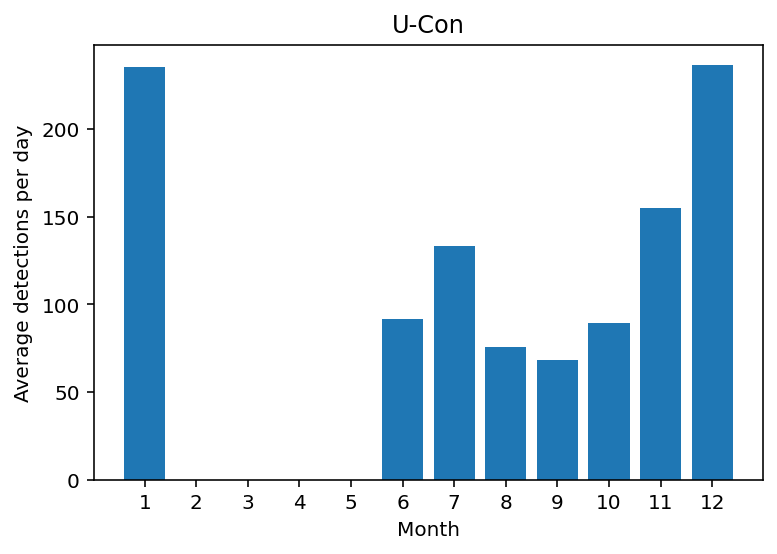

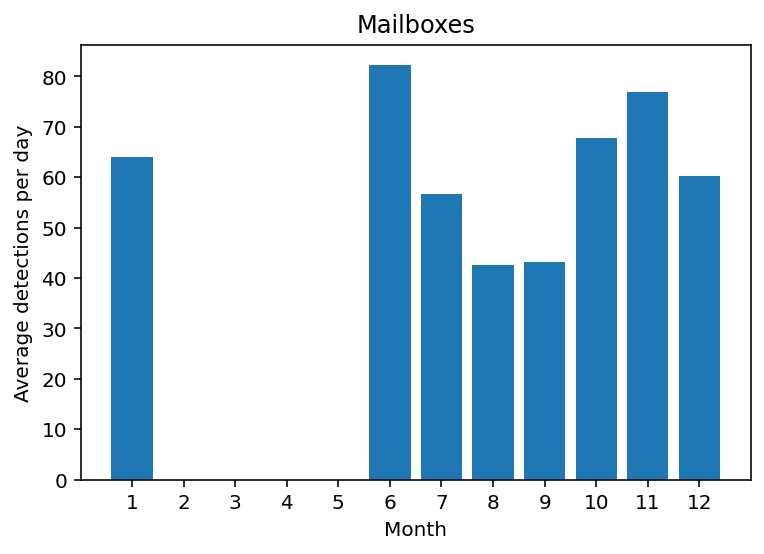

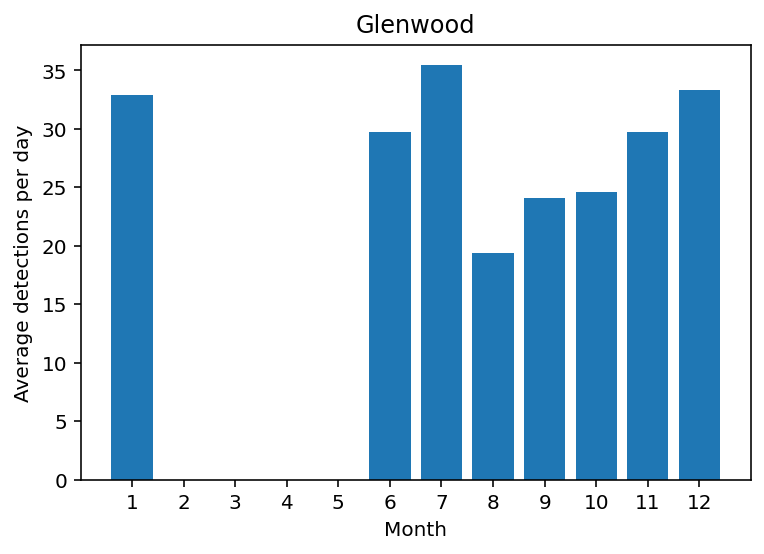

In [26]:
def plot(df, title=None):
    gb = df.groupby(df.index.month)
    gbm = gb.mean()

    plt.bar(gbm.index, gbm.daily)
    plt.xlabel('Month')
    plt.xticks(np.arange(1,13))
    plt.ylabel('Average detections per day')
    plt.title(title)
    plt.show()
plot(ucon, 'U-Con')
plot(mbox, 'Mailboxes')
plot(glen, 'Glenwood')

# Riders by hour of day
Complex patterns here may be exacerbated by inconsistent data transmission over time.

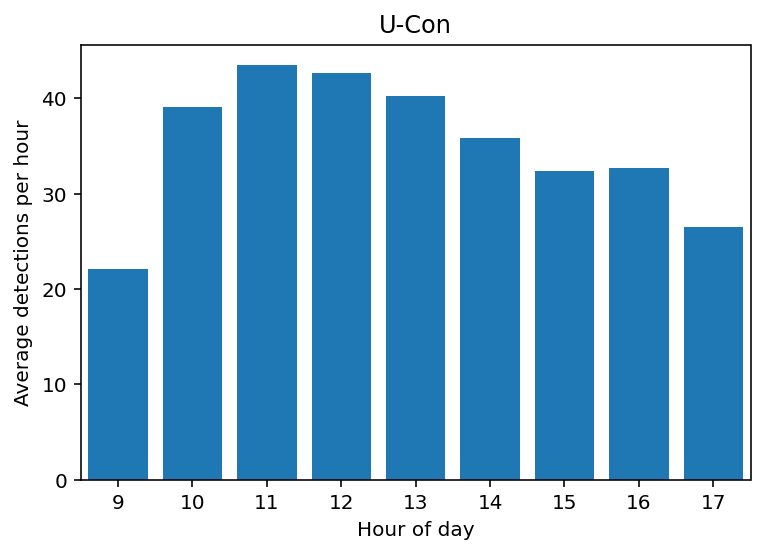

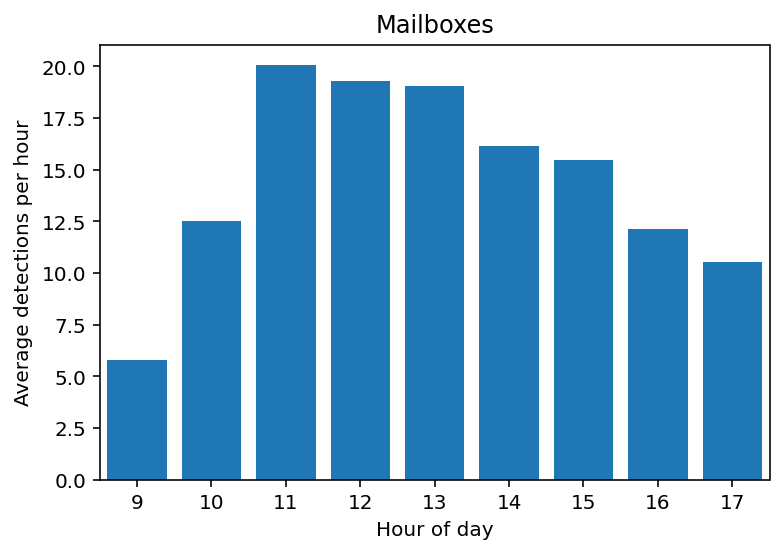

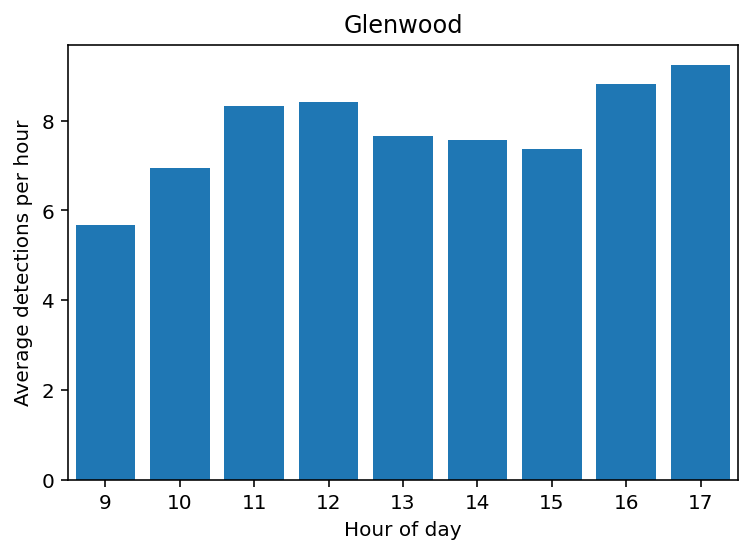

In [27]:
def plot(df, title=None):
    gb = df.groupby(df.index.hour)
    gbm = gb.mean()

    plt.bar(gbm.index, gbm.hourly)

    plt.xticks(np.arange(0,25))
    plt.xlim(8.5,17.5)
    plt.xlabel('Hour of day')
    plt.ylabel('Average detections per hour')
    plt.title(title)
    plt.show()
plot(ucon, title='U-Con')
plot(mbox[mbox.index.month > 6], 'Mailboxes')
plot(glen, 'Glenwood')
# %%

# Total cumulative riders
Note decrease in slope during August fires.

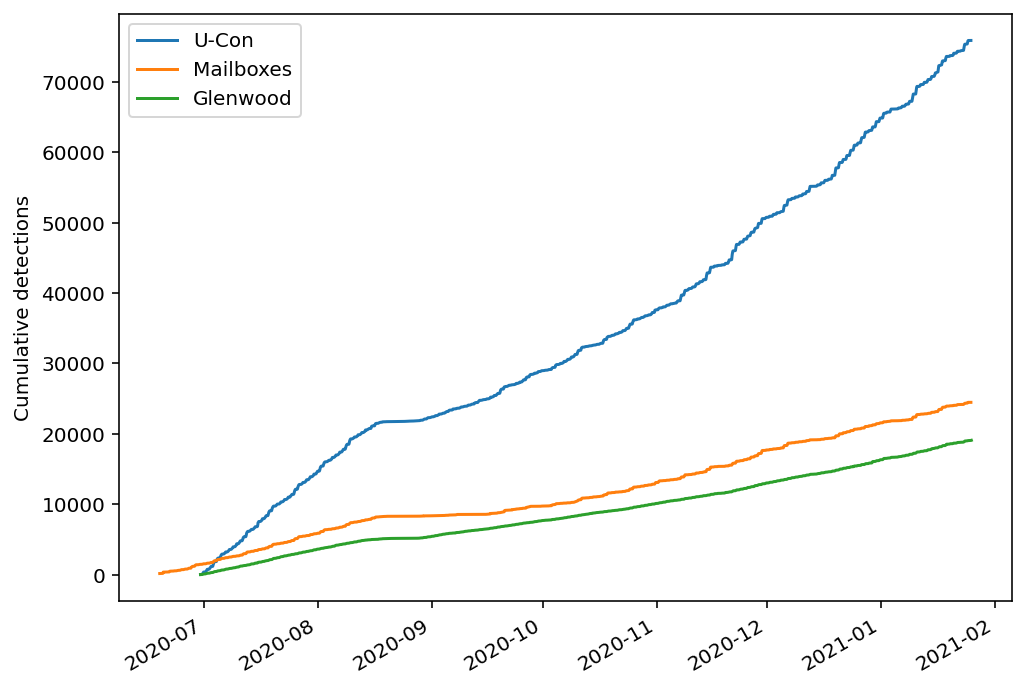

In [28]:
plt.figure(figsize=(8,6))
def plot(df, title=None):
    df.hourly.cumsum().plot(label=title)
plot(ucon, 'U-Con')
plot(mbox, 'Mailboxes')
plot(glen, 'Glenwood')
plt.ylabel('Cumulative detections')
plt.xlabel('')
plt.legend()
plt.show()

# Total riders by day and week of year
Weekends are popular, especially around Thanksgiving.

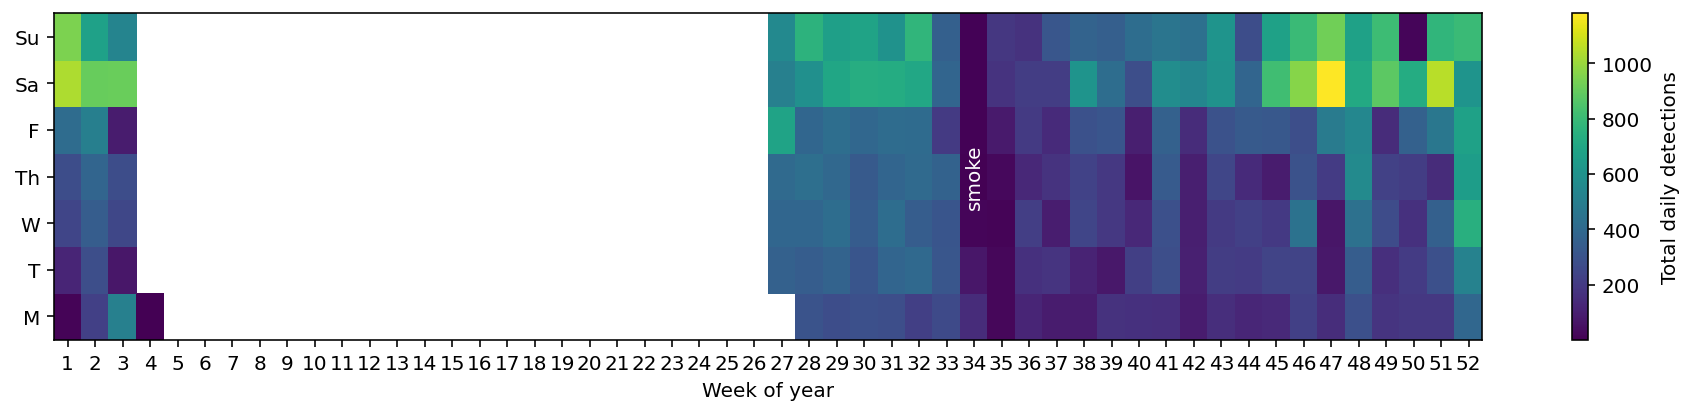

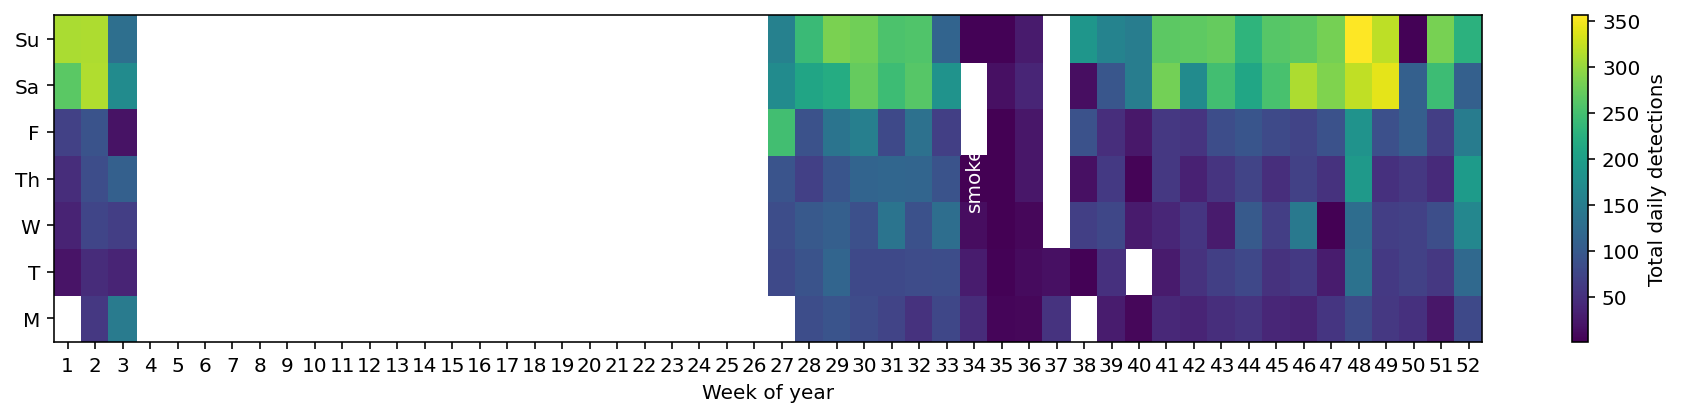

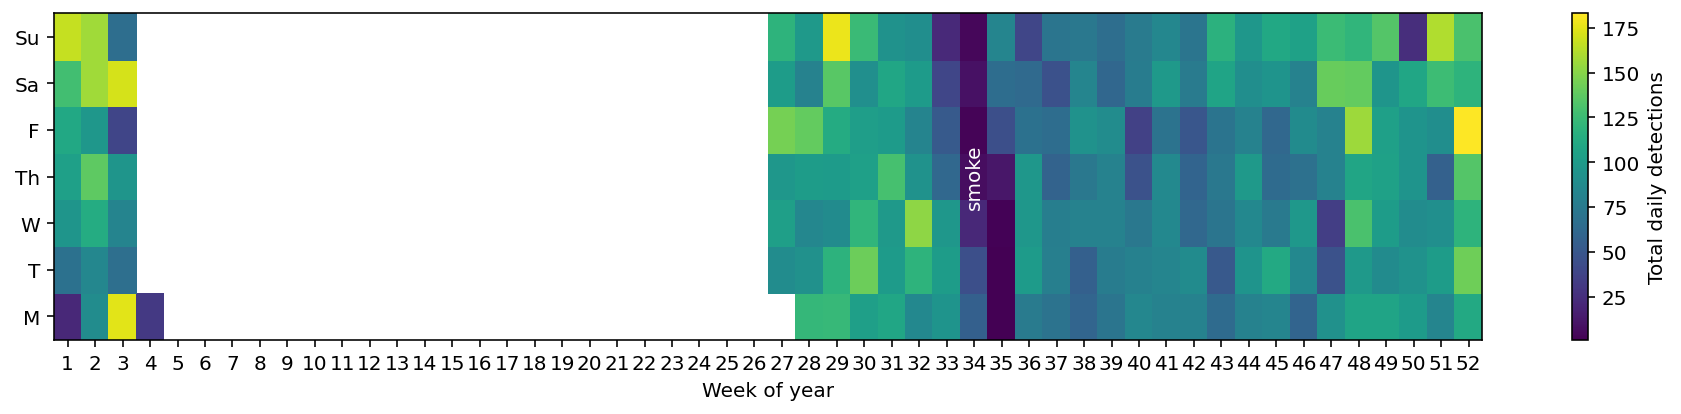

In [149]:
def plot(df, title=None):
    bs = scipy.stats.binned_statistic_2d(df.index.dayofweek, 
                                         df.index.weekofyear, 
                                         df.daily, statistic='max', bins=(np.arange(8), np.arange(1,54)),
                                        )
    bs.statistic[bs.statistic == 0] = np.nan
    plt.figure(figsize=(16,3))
    days = np.arange(8) + 0.5
    weeks = np.arange(1, 54) - 0.5
    plt.pcolormesh(weeks, days, bs.statistic,)#norm=matplotlib.colors.LogNorm())
    plt.yticks(np.arange(1,8), ['M', 'T', 'W' , 'Th', 'F', 'Sa', 'Su'])
    plt.xticks(np.arange(1,53))
    plt.text(34,4, 'smoke', color='w', ha='center', va='center', rotation=90)
    plt.colorbar(label='Total daily detections')
    plt.xlabel('Week of year')
    plt.show()
plot(ucon)
plot(mbox)
plot(glen)